## Importing Libraries

In [86]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error,mean_absolute_percentage_error,r2_score # type: ignore

## Adding the file path


In [87]:
df = pd.read_csv(r"Salary_Data.csv")

# EDA

In [88]:
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [90]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [91]:
df.isnull().sum()

Years of Experience    3
Salary                 5
dtype: int64

# Dropping NA Values as they are small

In [92]:
df = df.dropna()

In [93]:
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


## Double Checking NA values

In [94]:
df.isnull().sum()

Years of Experience    0
Salary                 0
dtype: int64

## Scatter Plot

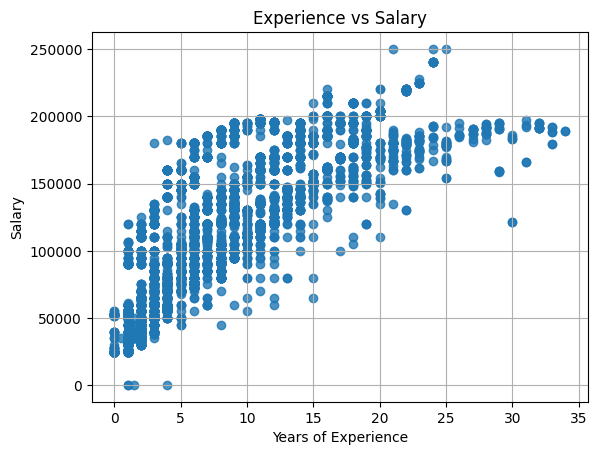

In [95]:
import matplotlib.pyplot as plt #type: ignore
# Scatter plot
plt.scatter(df['Years of Experience'], df['Salary'], alpha=0.8)

# Adding labels and title
plt.title('Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)

# Display the plot
plt.show()

## Boxplot

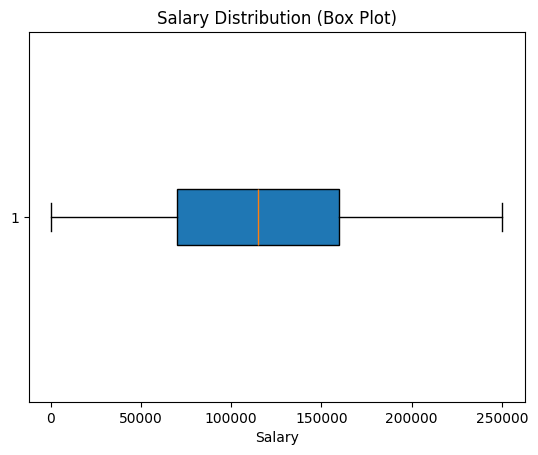

In [96]:
plt.boxplot(df['Salary'], vert=False, patch_artist=True)
plt.title('Salary Distribution (Box Plot)')
plt.xlabel('Salary')
plt.show()

## Removing Outliers

In [97]:
from scipy.stats import zscore #type: ignore

# Compute Z-scores for each column
z_scores = df.apply(zscore)

# Remove rows where Z-scores are above the threshold
threshold = 3
filtered_df = df[(z_scores['Years of Experience'].abs() < threshold) & 
                 (z_scores['Salary'].abs() < threshold)]

print("Filtered DataFrame using Z-score:")
filtered_df.head()
df = filtered_df

Filtered DataFrame using Z-score:


In [98]:
# Define features and target variable
X = df[['Years of Experience']]  # Features (independent variable)
y = df['Salary']        # Target (dependent variable)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [99]:
X_train.head()

,Years of Experience
5236,1.0
3810,6.0
5788,11.0
2444,20.0
2822,4.0


# Model Creation and Fitting

In [100]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [7628.64855815]
Model Intercept: 54782.12093941802


## Making Predictions

In [101]:
# Make predictions
y_pred = model.predict(X_test)


## Model Evaluation

In [102]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)
print('Mean Absolute Error = ', mae)
print('Mean Absolute Percentage Error = ', mape)
print('Mean Squared Error = ', mse)
# print('Root Mean Squared Error = ', rmse)
print('R2 Square = ', r_squared)
#print validation accuracy

Mean Absolute Error =  23915.596408834117
Mean Absolute Percentage Error =  0.36376219576985663
Mean Squared Error =  887272056.0967814
R2 Square =  0.6824007270036381


## Plotting the Model

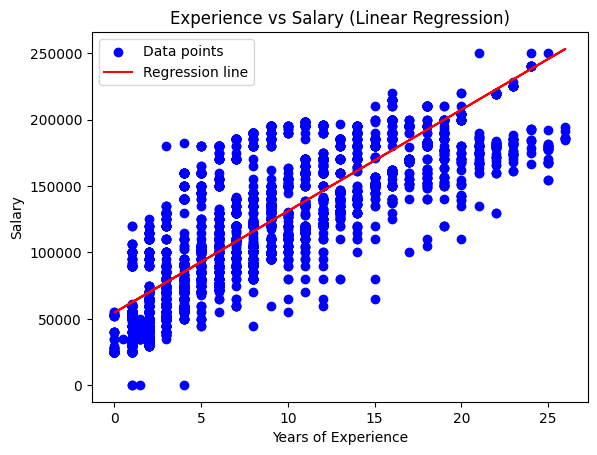

In [103]:
# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression line')

plt.title('Experience vs Salary (Linear Regression)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


Text(0, 0.5, 'Predicted')

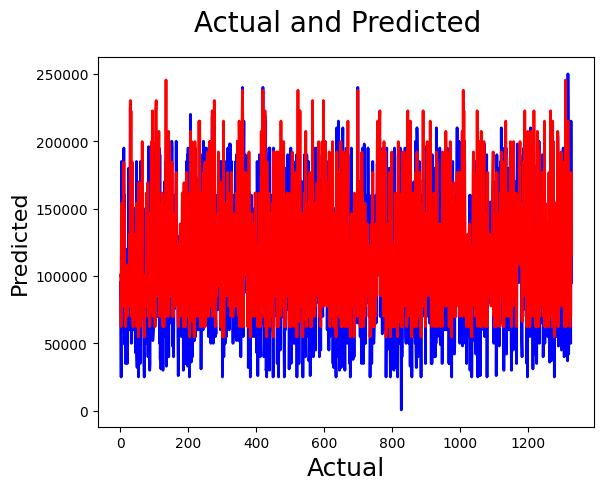

In [104]:
# Actual vs Predicted

c = [i for i in range(1,len(y_test)+1,1)]         
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                              
plt.ylabel('Predicted', fontsize=16)    

## Predicting on our data

In [105]:
model.predict([[10.0]])

c:\Users\abhij\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([131068.60652095])